In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/TA/Data5/FIX TA


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/TA/Data5/FIX TA


In [2]:
ls

'Copy of XGBoost Smote.ipynb'   SVM.ipynb          XGBoost.ipynb
 Immunotherapy.csv             'SVM Smote.ipynb'  'XGBoost Smote.ipynb'


In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
dt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TA/Data5/FIX TA/Immunotherapy.csv')
dt.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


**== Pengertian tiap atribut==**

*sex* = merupakan gender atau jenis kelamin dimana (1) merupakan laki-laki dengan jumlah 41 dan (2) merupakan wanita dengan jumlah 49

*age* = merupakan umur dari pasien dengan rentang 15-56 tahun

*time* = waktu berlalu sebelum perawatan rentang waktu dalam bulan

*number of wart* = merupakan jumlah kutil yang terdapat pada pasien mulai dari 1 - 19

*Types of wart (Count)* = jenis kutil yang ada yaitu 1 common (umum) ada (47) , 2 Plantar (22) , 3 both (21)

*Surface area of the wartsa (mm2)* = atau luas dari permukaan kutil mulai dari 6 mm^2 - 900 mm^2

*Induration diameter of initial test(mm)* = Diameter indurasi tes awal (mm) mulai dari 5 mm - 70 mm

*Result_of_Treatment* = hasil dari treatment (terapi yang dijalankan berhasil atau tidak)

**Data Exploration**

In [5]:
def annot_plot(ax,w,h):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  for p in ax.patches:
      ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


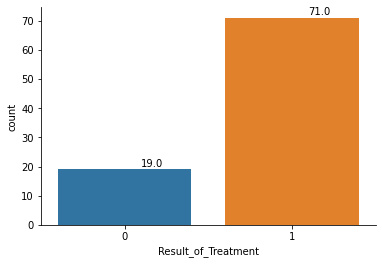

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot('Result_of_Treatment', data =dt)
annot_plot(ax, 0.5,1)

**Preprocessing Data**

In [7]:
x = dt.drop(['Result_of_Treatment'], axis=1).values
y = dt['Result_of_Treatment'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

*Feature Scaler*

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[0.        , 0.17073171, 0.11363636, 0.72222222, 1.        ,
        0.05033557, 0.70588235],
       [0.        , 0.        , 0.18181818, 0.05555556, 1.        ,
        1.        , 1.        ],
       [0.        , 0.02439024, 0.86363636, 0.05555556, 0.        ,
        0.10514541, 0.33823529],
       [0.        , 0.29268293, 0.31818182, 0.44444444, 1.        ,
        0.08277405, 0.41176471],
       [0.        , 0.12195122, 0.63636364, 0.27777778, 0.        ,
        0.04362416, 0.08823529],
       [0.        , 0.        , 0.36363636, 0.11111111, 1.        ,
        0.08724832, 0.07352941],
       [0.        , 0.48780488, 0.79545455, 0.05555556, 0.5       ,
        0.00223714, 0.05882353],
       [1.        , 0.31707317, 0.59090909, 0.16666667, 0.        ,
        0.0033557 , 0.        ],
       [1.        , 0.09756098, 0.45454545, 0.05555556, 0.        ,
        0.24496644, 0.08823529],
       [1.        , 0.41463415, 1.        , 0.27777778, 1.        ,
        0.03243848, 0.0

*Splitting Dataset 80 : 20*

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y , test_size=0.2, random_state=12)

**XGBoost Classifier**

In [10]:
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score,f1_score,classification_report

In [11]:
#fit model training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

In [12]:
from collections import Counter
print('Data Train', Counter(y_train))
print('Data Test', Counter(y_test))

Data Train Counter({1: 56, 0: 16})
Data Test Counter({1: 15, 0: 3})


**Classification Report**

In [13]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [14]:
acc = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 88.89%


In [15]:
precision = precision_score(y_test, predictions)
print("Precision : %.2f%%" % (precision * 100.0))

Precision : 88.24%


In [16]:
recall = recall_score(y_test, y_pred)
print("Recall : ",recall )

#F1 SCORE

f1score = f1_score(y_test.T,y_pred, average='macro')
print("F1 Score : ",f1score )

Recall :  1.0
F1 Score :  0.71875


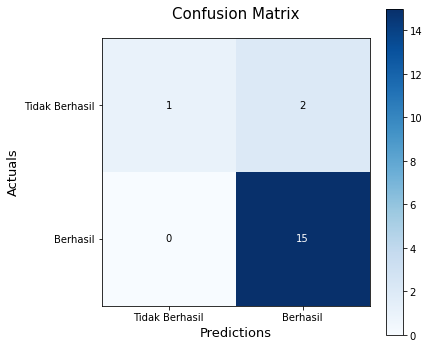

In [17]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues,colorbar=True,fontcolor_threshold=0.5)
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Actuals', fontsize=13)
ax.set_yticks([0,1])
ax.set_yticklabels(['Tidak Berhasil', 'Berhasil'])
ax.set_xticks([0,1])
ax.set_xticklabels(['Tidak Berhasil', 'Berhasil'])
plt.title('Confusion Matrix', fontsize=15)

plt.show()

In [18]:
from sklearn.metrics import classification_report
ypred = model.predict(x_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.88      1.00      0.94        15

    accuracy                           0.89        18
   macro avg       0.94      0.67      0.72        18
weighted avg       0.90      0.89      0.86        18

